# Introduction

The business problem I will be exploring is trying to predict the severity of a car accident depending on several other variables that I will use to train a model. I will use the provided sample data to further explore this topic. Anyone that owns a car or drives would be interested.

# Data

I will be using the sample data provided, which includes various information regarding car accidents and their severity. The data includes factors such as weather during the accident, daylight, and number of people involved. All of these attributes will be used to train a model that can predict whether an accident will likely be severe or not. The target variable will be 'SEVERITYCODE' because it measures the severity of an accident from 1 to 2. Attributes used to weigh the severity of an accident are 'WEATHER', 'ROADCOND' and 'LIGHTCOND'.

# Methodology

We must first import and convert the data set into a dataset that is fit for analysis by cleaning and balancing the data.

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
df = pd.DataFrame(df_data_0, columns= ['SEVERITYCODE','COLLISIONTYPE','ADDRTYPE','ROADCOND','WEATHER','LIGHTCOND','JUNCTIONTYPE'])
df.head()

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,JUNCTIONTYPE
0,2,Angles,Intersection,Wet,Overcast,Daylight,At Intersection (intersection related)
1,1,Sideswipe,Block,Wet,Raining,Dark - Street Lights On,Mid-Block (not related to intersection)
2,1,Parked Car,Block,Dry,Overcast,Daylight,Mid-Block (not related to intersection)
3,1,Other,Block,Dry,Clear,Daylight,Mid-Block (not related to intersection)
4,2,Angles,Intersection,Wet,Raining,Daylight,At Intersection (intersection related)


Then I will convert the data into numerical data so that it will be easier to plot on graphs. I chose to do this one coloumn at a time to make sure it was done correctly.

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
train = df
test = df

In [4]:
train.head(5)

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,JUNCTIONTYPE
0,2,Angles,Intersection,Wet,Overcast,Daylight,At Intersection (intersection related)
1,1,Sideswipe,Block,Wet,Raining,Dark - Street Lights On,Mid-Block (not related to intersection)
2,1,Parked Car,Block,Dry,Overcast,Daylight,Mid-Block (not related to intersection)
3,1,Other,Block,Dry,Clear,Daylight,Mid-Block (not related to intersection)
4,2,Angles,Intersection,Wet,Raining,Daylight,At Intersection (intersection related)


In [5]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
train['ROADCOND'] = number.fit_transform(train['ROADCOND'].astype('str'))
test['ROADCOND'] = number.fit_transform(test['ROADCOND'].astype('str'))
train.head(5)

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,JUNCTIONTYPE
0,2,Angles,Intersection,8,Overcast,Daylight,At Intersection (intersection related)
1,1,Sideswipe,Block,8,Raining,Dark - Street Lights On,Mid-Block (not related to intersection)
2,1,Parked Car,Block,0,Overcast,Daylight,Mid-Block (not related to intersection)
3,1,Other,Block,0,Clear,Daylight,Mid-Block (not related to intersection)
4,2,Angles,Intersection,8,Raining,Daylight,At Intersection (intersection related)


In [6]:
train['WEATHER'] = number.fit_transform(train['WEATHER'].astype('str'))
test['WEATHER'] = number.fit_transform(test['WEATHER'].astype('str'))
train.head(5)

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,JUNCTIONTYPE
0,2,Angles,Intersection,8,6,Daylight,At Intersection (intersection related)
1,1,Sideswipe,Block,8,8,Dark - Street Lights On,Mid-Block (not related to intersection)
2,1,Parked Car,Block,0,6,Daylight,Mid-Block (not related to intersection)
3,1,Other,Block,0,1,Daylight,Mid-Block (not related to intersection)
4,2,Angles,Intersection,8,8,Daylight,At Intersection (intersection related)


In [7]:
train['LIGHTCOND'] = number.fit_transform(train['LIGHTCOND'].astype('str'))
test['LIGHTCOND'] = number.fit_transform(test['LIGHTCOND'].astype('str'))
train.head(5)

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,JUNCTIONTYPE
0,2,Angles,Intersection,8,6,5,At Intersection (intersection related)
1,1,Sideswipe,Block,8,8,2,Mid-Block (not related to intersection)
2,1,Parked Car,Block,0,6,5,Mid-Block (not related to intersection)
3,1,Other,Block,0,1,5,Mid-Block (not related to intersection)
4,2,Angles,Intersection,8,8,5,At Intersection (intersection related)


In [8]:
train['ADDRTYPE'] = number.fit_transform(train['ADDRTYPE'].astype('str'))
test['ADDRTYPE'] = number.fit_transform(test['ADDRTYPE'].astype('str'))
train.head(5)

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,JUNCTIONTYPE
0,2,Angles,2,8,6,5,At Intersection (intersection related)
1,1,Sideswipe,1,8,8,2,Mid-Block (not related to intersection)
2,1,Parked Car,1,0,6,5,Mid-Block (not related to intersection)
3,1,Other,1,0,1,5,Mid-Block (not related to intersection)
4,2,Angles,2,8,8,5,At Intersection (intersection related)


In [9]:
train['COLLISIONTYPE'] = number.fit_transform(train['COLLISIONTYPE'].astype('str'))
test['COLLISIONTYPE'] = number.fit_transform(test['COLLISIONTYPE'].astype('str'))
train.head(5)

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,JUNCTIONTYPE
0,2,0,2,8,6,5,At Intersection (intersection related)
1,1,10,1,8,8,2,Mid-Block (not related to intersection)
2,1,6,1,0,6,5,Mid-Block (not related to intersection)
3,1,5,1,0,1,5,Mid-Block (not related to intersection)
4,2,0,2,8,8,5,At Intersection (intersection related)


In [11]:
train['JUNCTIONTYPE'] = number.fit_transform(train['JUNCTIONTYPE'].astype('str'))
test['JUNCTIONTYPE'] = number.fit_transform(test['JUNCTIONTYPE'].astype('str'))
train.head(5)

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,JUNCTIONTYPE
0,2,0,2,8,6,5,1
1,1,10,1,8,8,2,4
2,1,6,1,0,6,5,4
3,1,5,1,0,1,5,4
4,2,0,2,8,8,5,1


Now that the data is converted into numerical data, I can use descriptive statistics to learn more about the data.

In [12]:
train.describe ()

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,ROADCOND,WEATHER,LIGHTCOND,JUNCTIONTYPE
count,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,1.298901,5.209834,1.350182,2.764580,3.111921,4.521993,2.860741
std,0.457778,3.127883,0.505033,3.743681,2.870640,1.845540,1.551867
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,1.000000,0.000000,1.000000,2.000000,1.000000
50%,1.000000,6.000000,1.000000,0.000000,1.000000,5.000000,3.000000
75%,2.000000,8.000000,2.000000,8.000000,6.000000,5.000000,4.000000
max,2.000000,10.000000,3.000000,9.000000,11.000000,9.000000,7.000000


In [13]:
WEATHER_counts = df["WEATHER"].value_counts().to_frame()
print (WEATHER_counts)

    WEATHER
1    111135
8     33145
6     27714
2     15091
3      5081
11      907
5       832
4       569
10      113
0        56
9        25
7         5


From using the Value Counts function, it is clear that Raining and Overcast (represented by 1 and 8 respectively) conditions were the most often associated with accidents.

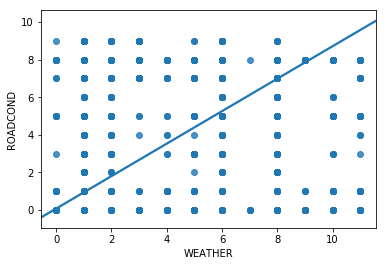

In [15]:
import seaborn as sns
sns.regplot(x="WEATHER", y="ROADCOND", data=test)

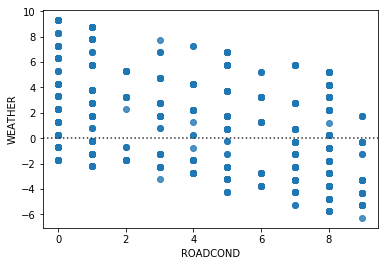

In [18]:
sns.residplot(test['ROADCOND'], test['WEATHER'])

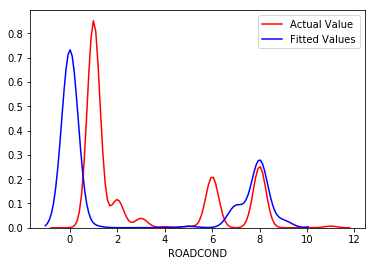

In [21]:
axl = sns.distplot(test['WEATHER'], hist=False, color="r", label="Actual Value")
sns.distplot(test['ROADCOND'], hist=False, color="b", label="Fitted Values", ax=axl)

The above graphs show the impact of weather on roadconditions and how that causes an increase in frequency of severe accidents. Overcast and rainy weather are clear indicators of severe accidents.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 17
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

knn_y_pred = knn.predict(X_test)
knn_y_pred[0:5]

# Results

The results show that WEATHER directly relates to ROADCOND. The weather responsible for the most accidents was Overcast and Rainy. Therefore, drivers would be wise to avoid driving on those days. The distribution plot clearly shows this relationship.

# Discussion

I noticed that there was difficulty visualizing the model because there was only "1" or "2" for SEVERITYCODE entries. In the future, a more accurate and thorough model could be made with more specific severity codes. The biggest indicator of an accident being severe, however, is clearly the quality of road conditions and weather at time of driving.

# Conclussion

In conclusion, after importing the sample data and visualizing it using python, it was clear that weather conditions and road conditions are the most clear indicators of a